# EPS VGEO X-ray 18MV water phantom simulation

`Geant4 v10.7.3`

- AMD EPYC 7643 (2.3GHz / 3.6GHz) 48 cores x 2 SMT : AlmaLinux 8.5
- AMD Ryzen Threadripper PRO 3995WX (2.7GHz / 4.2GHz) 64 cores x 1 SMT : Ubuntu 20.04LTS
- Intel Xeon Gold 6240 (2.6GHz / 3.9GHz) 18 cores x 2 HT : Ubuntu 20.04LTS
- Intel Core i9-12900K (3.2GHz / 5.2GHz + 2.4GHz / 3.9GHz) 8 cores(P) HT + 8 cores (E) : Ubuntu 20.04LTS
- Apple M1 4 cores (P) + 4 cores (E) (ARMv8) : macOS Monterey 12.1

In [1]:
import pandas
import json
import os

data_dir = "./data/10.7.3/"
cpu_list = os.listdir(data_dir)
cpu_list

['apple_m1', 'epyc_7643', 'i9-12900K', 'ryzen_trpro_3995wx', 'xeon_gold_6240']

In [2]:
ecal_df = []
for cpu in cpu_list:
    ecal_df.append(pandas.read_json(data_dir + cpu + '/vgeo_x18.json'))
    ecal_df[-1] = ecal_df[-1].sort_values('thread')

In [3]:
import matplotlib.pyplot as plt
import numpy

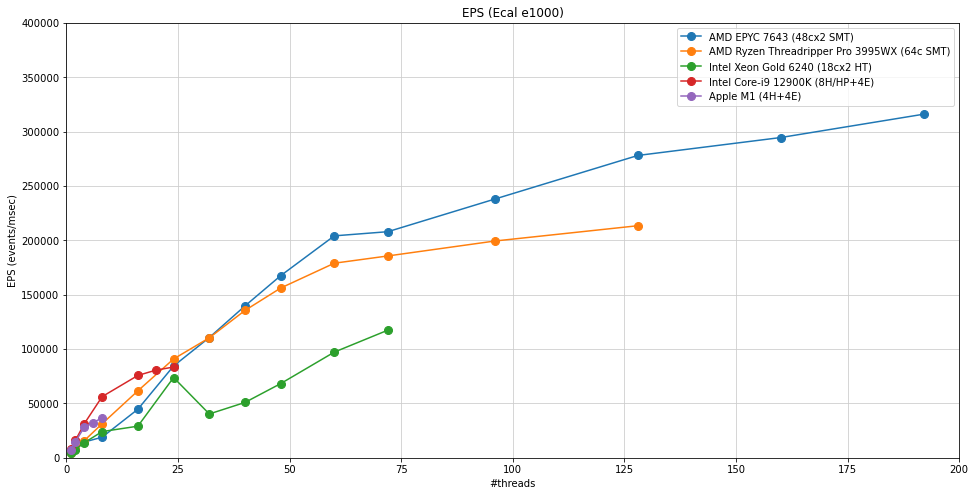

In [7]:
plt.figure(figsize=(16,8))
plt.title("EPS (Ecal e1000)")
plt.xlabel("#threads")
plt.ylabel("EPS (events/msec)")
plt.xlim([0,200])
plt.ylim([0,400000])
plt.grid(which="both", color="#cccccc")
plot = plt.plot(ecal_df[1]['thread'], ecal_df[1]['eps']*1000, 'o-', markersize=8, label='AMD EPYC 7643 (48cx2 SMT)')
plot = plt.plot(ecal_df[3]['thread'], ecal_df[3]['eps']*1000, 'o-', markersize=8, label='AMD Ryzen Threadripper Pro 3995WX (64c SMT)')
plot = plt.plot(ecal_df[4]['thread'], ecal_df[4]['eps']*1000, 'o-', markersize=8, label='Intel Xeon Gold 6240 (18cx2 HT)')
plot = plt.plot(ecal_df[2]['thread'], ecal_df[2]['eps']*1000, 'o-', markersize=8, label='Intel Core-i9 12900K (8H/HP+4E)')
plot = plt.plot(ecal_df[0]['thread'], ecal_df[0]['eps']*1000, 'o-', markersize=8, label='Apple M1 (4H+4E)')
plt.legend()